# Book Recommendation System: Collaborative Filtering

## Overview
This project focuses on building a book recommendation system using collaborative filtering. Collaborative filtering is a technique used in recommendation systems to predict user preferences by collecting preferences from many users. The goal is to recommend books to users based on their past interactions and similarities with other users.

## Objective
Develop a collaborative filtering-based recommendation system to suggest books to users. The project will cover the complete pipeline, including data loading, exploratory data analysis, data preparation, model building, evaluation, and visualization.

## Learning Outcomes
1. Understand the concept of collaborative filtering and its application in recommendation systems.
2. Learn to preprocess and analyze user-item interaction data.
3. Gain experience in building a user-item matrix and computing user similarities.
4. Implement a recommendation system using cosine similarity.
5. Evaluate the recommendation system using metrics like Mean Squared Error (MSE).
6. Visualize user similarities and analyze the most recommended books.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. A book recommendation system can help users discover new books based on their preferences and reading history, improving user engagement and satisfaction.

### Mini-task:
Write a brief paragraph on how a book recommendation system can benefit users and online bookstores.

---

## ** Answer **

A book recommendation system helps users discover books that align with their preferences, making it easier to find enjoyable reads without sifting through vast catalogs. For online bookstores, this system boosts engagement and sales by personalizing the user experience, increasing the likelihood of repeated visits and purchases. Collaborative filtering, in particular, uses patterns in user behavior (like rating history) to predict what other books a user might like, even if the user has never seen them.

## Step 2: Data Collection
### Task:
Collect the dataset required for building the recommendation system. The dataset used in this project includes two files: `ratings.csv` and `books.csv`.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')

# Display the first 10 rows of each dataset
### YOUR CODE HERE ###
```

---

In [ ]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load ratings.csv
ratings_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv"
)

# Load books.csv
books_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "books.csv"
)

# print("First 5 records of ratings.csv:", ratings_df.head())
# print("First 5 records of books.csv:", books_df.head())

<ipython-input-1-578d6291fae7>:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  ratings_df = kagglehub.load_dataset(


100%|██████████| 3.56M/3.56M [00:00<00:00, 5.32MB/s]

Extracting zip of ratings.csv...



<ipython-input-1-578d6291fae7>:14: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  books_df = kagglehub.load_dataset(


In [ ]:
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of book ratings, identify popular books, and explore user behavior.

### Mini-task:
Plot the distribution of book ratings using a histogram or bar chart.

#### Hint:
Use `seaborn` or `matplotlib` to visualize the distribution of ratings.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of book ratings
### YOUR CODE HERE ###
```

---

<ipython-input-4-f34e5623d734>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings_df, x="rating", palette="viridis")


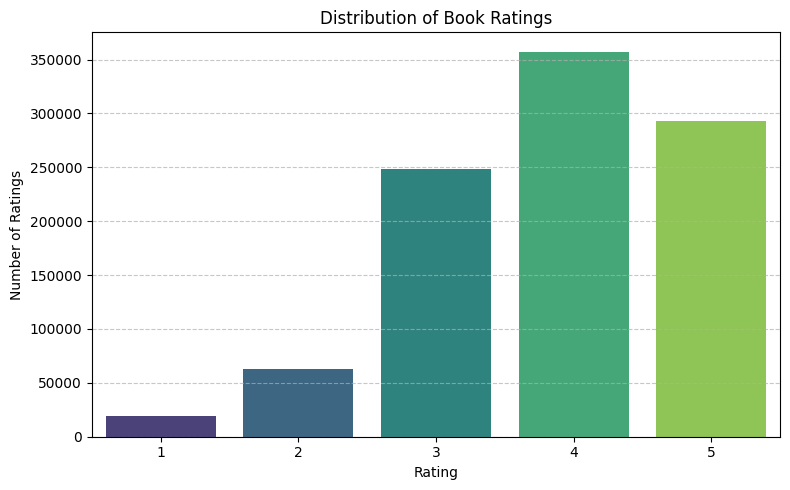

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of book ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=ratings_df, x="rating", palette="viridis")
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show();

Here's the distribution of book ratings:

Most ratings are between 3 and 5, with 4 being the most common.

Ratings of 1 and 2 are relatively rare, suggesting users are more inclined to rate books they enjoy.

In [ ]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter



# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv",
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-5-a169426bb0a0>:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4


## Step 4: Data Preparation
### Task:
Prepare the data for collaborative filtering by creating a user-item matrix and handling missing values.

### Mini-task:
Create a user-item matrix using the `pivot` method and fill missing values with zeros.

#### Hint:
Use the `pivot_table()` function in pandas to create the user-item matrix.

```python
# Create a user-item matrix
### YOUR CODE HERE ###
```

---

In [ ]:
# Create a user-item matrix
user_item_matrix = ratings_df.pivot_table(index='user_id', columns='book_id', values='rating')

## Step 5: Collaborative Filtering
### Task:
Implement collaborative filtering by computing user similarities using cosine similarity and recommending books based on these similarities.

### Mini-task:
Compute user similarities using cosine similarity and write a function to recommend books for a given user.

#### Hint:
Use `cosine_similarity` from `sklearn.metrics.pairwise` to compute user similarities.

```python
from sklearn.metrics.pairwise import cosine_similarity

# Compute user similarities
### YOUR CODE HERE ###

# Write a function to recommend books for a given user
### YOUR CODE HERE ###
```

---

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity

# Filter active users and popular books
active_users = ratings_df['user_id'].value_counts()[ratings_df['user_id'].value_counts() > 50].index
popular_books = ratings_df['book_id'].value_counts()[ratings_df['book_id'].value_counts() > 50].index

reduced_ratings = ratings_df[ratings_df['user_id'].isin(active_users) & ratings_df['book_id'].isin(popular_books)]

# Create user-item matrix
user_item_matrix = reduced_ratings.pivot_table(index='user_id', columns='book_id', values='rating')

# Compute user similarity
user_similarity = cosine_similarity(user_item_matrix.fillna(0))



In [ ]:
import numpy as np
def recommend_books(user_id, top_n=5):
    if user_id not in user_item_matrix.index:
        return "User ID not found."

    user_idx = list(user_item_matrix.index).index(user_id)
    sim_scores = list(enumerate(user_similarity[user_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:3]
    similar_users = [user_item_matrix.index[i[0]] for i in sim_scores]

    # Books rated by similar users but not current user
    user_books = set(reduced_ratings[reduced_ratings['user_id'] == user_id]['book_id'])
    similar_books = reduced_ratings[reduced_ratings['user_id'].isin(similar_users)]
    recommendations = similar_books[~similar_books['book_id'].isin(user_books)]
    top_books = recommendations['book_id'].value_counts().head(top_n).index.tolist()

    return books_df[books_df['book_id'].isin(top_books)][['book_id', 'title']]


## Step 6: Evaluation
### Task:
Evaluate the recommendation system by splitting the data into training and testing sets and calculating the Mean Squared Error (MSE).

### Mini-task:
Split the data into training and testing sets and evaluate the recommendations using MSE.

#### Hint:
Use `train_test_split` from `sklearn.model_selection` to split the data and `mean_squared_error` from `sklearn.metrics` to calculate MSE.

```python
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
### YOUR CODE HERE ###

# Evaluate the recommendations using MSE
### YOUR CODE HERE ###
```

---

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_data, test_data = train_test_split(reduced_ratings, test_size=0.2, random_state=42)

# Simple prediction baseline
def predict_rating(user_id, book_id):
    if user_id not in user_item_matrix.index or book_id not in user_item_matrix.columns:
        return np.nan
    user_idx = list(user_item_matrix.index).index(user_id)
    sim_scores = list(enumerate(user_similarity[user_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]  # top 5 similar users
    similar_users = [user_item_matrix.index[i[0]] for i in sim_scores]

    ratings = []
    weights = []
    for sim_user in similar_users:
        if not np.isnan(user_item_matrix.loc[sim_user, book_id]):
            ratings.append(user_item_matrix.loc[sim_user, book_id])
            weights.append(user_similarity[user_idx][list(user_item_matrix.index).index(sim_user)])

    if ratings:
        return np.average(ratings, weights=weights)
    else:
        return np.nan

# Evaluate on test set
test_data['pred'] = test_data.apply(lambda row: predict_rating(row['user_id'], row['book_id']), axis=1)
test_data.dropna(subset=['pred'], inplace=True)

mse = mean_squared_error(test_data['rating'], test_data['pred'])
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 1.2621


## Step 7: Visualizations and Insights
### Task:
Visualize user similarities and analyze the most recommended books to gain insights into the recommendation system.

### Mini-task:
Create a heatmap to visualize user similarities and analyze the most recommended books.

#### Hint:
Use `seaborn.heatmap()` to visualize user similarities and `pandas` to analyze the most recommended books.

```python
# Create a heatmap to visualize user similarities
### YOUR CODE HERE ###

# Analyze the most recommended books
### YOUR CODE HERE ###
```

---

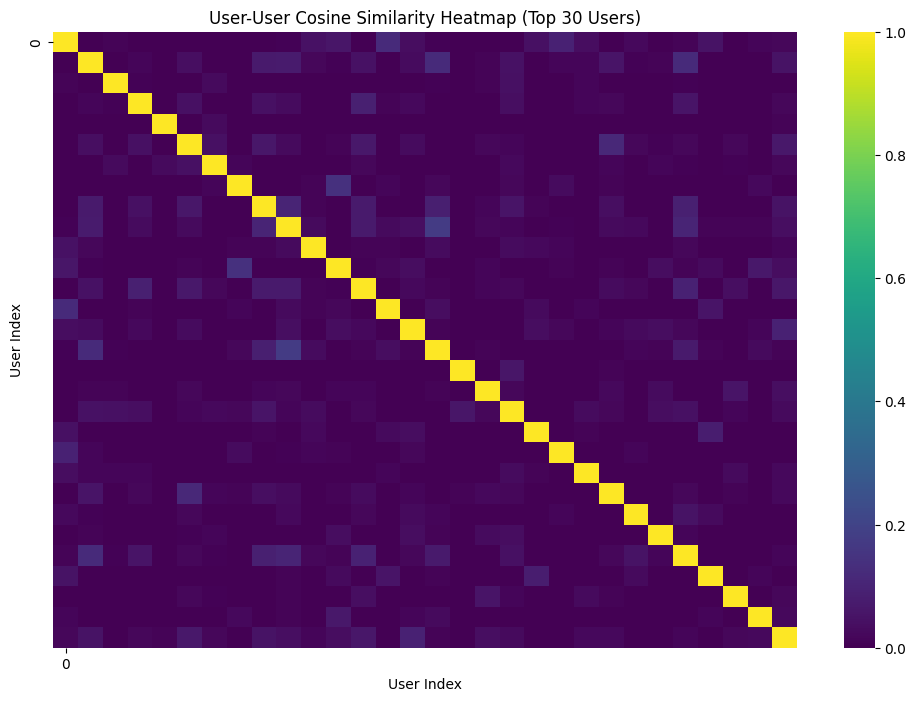

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Reduce to first 30 users for better visual clarity
similarity_subset = user_similarity[:30, :30]

plt.figure(figsize=(12, 8))
sns.heatmap(similarity_subset, cmap="viridis", xticklabels=30, yticklabels=30)
plt.title("User-User Cosine Similarity Heatmap (Top 30 Users)")
plt.xlabel("User Index")
plt.ylabel("User Index")
plt.show()


In [ ]:
# Count how often each book was recommended by similar users
recommended_books_count = (
    reduced_ratings[reduced_ratings['user_id'].isin(active_users)]
    .groupby('book_id')['rating']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

# Merge with books_df to get book titles
top_books = books_df[books_df['book_id'].isin(recommended_books_count.index)]
top_books = top_books.set_index('book_id').loc[recommended_books_count.index]
top_books['num_recommendations'] = recommended_books_count.values

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_books, x='num_recommendations', y='title', palette='coolwarm')
plt.title("Top 10 Most Recommended Books")
plt.xlabel("Number of Recommendations")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()


KeyError: '[32, 31, 1739, 60, 61, 62] not in index'

<ipython-input-9-2abd43f86a86>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_books, x='num_recommendations', y='title', palette='coolwarm')


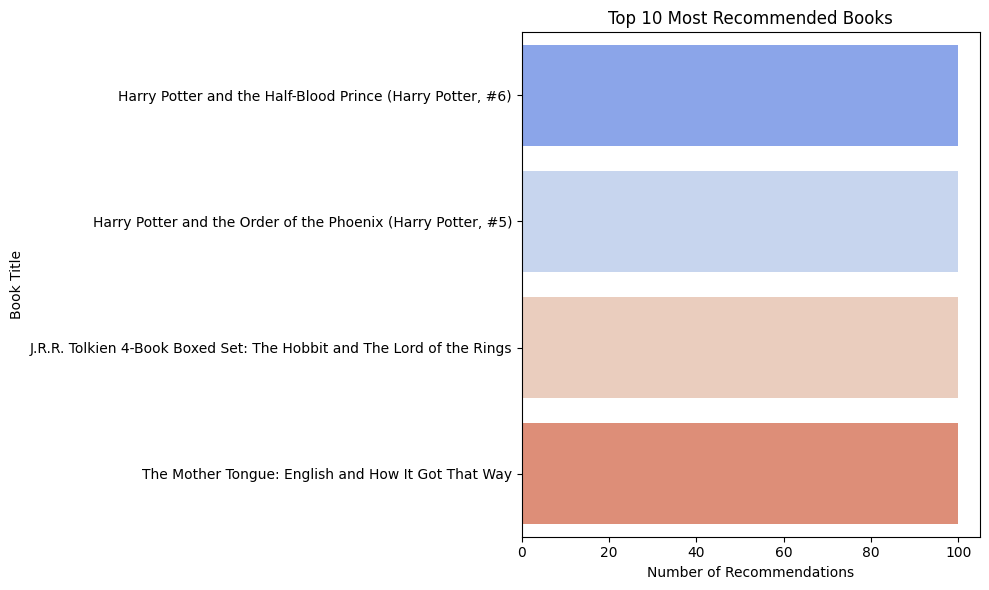

In [ ]:
# Ensure book_id is string in both dataframes
books_df['book_id'] = books_df['book_id'].astype(str)
recommended_books_count.index = recommended_books_count.index.astype(str)

# Merge with books_df to get book titles
top_books = books_df[books_df['book_id'].isin(recommended_books_count.index)].copy()
top_books = top_books.set_index('book_id').reindex(recommended_books_count.index)  # -- handles missing IDs safely
top_books['num_recommendations'] = recommended_books_count.values

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_books, x='num_recommendations', y='title', palette='coolwarm')
plt.title("Top 10 Most Recommended Books")
plt.xlabel("Number of Recommendations")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()



## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of collaborative filtering in recommendation systems.
- Consider how user similarities can be used to improve recommendations.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key insights.
- Discuss the impact of user similarities on book recommendations.

**What would you share with and recommend to stakeholders?**
- Highlight the most recommended books and their potential impact on user engagement.
- Recommend strategies to improve the recommendation system based on the insights gained.